In [94]:
import numpy as np
import pandas as pd

In [95]:
import pandas as pd

# Define column names from german.doc
column_names = [
    'Status_Checking_Acc', 'Duration', 'Credit_History', 'Purpose',
    'Credit_Amount', 'Savings_Account_Bonds', 'Employment',
    'Installment_Rate', 'Personal_Status_Sex', 'Other_Debtors',
    'Residence_Since', 'Property', 'Age', 'Other_Installment_Plans',
    'Housing', 'Number_Credits', 'Job', 'People_Maintained',
    'Telephone', 'Foreign_Worker', 'Credit_Risk'
]

# Load dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
df = pd.read_csv(url, sep=' ', header=None, names=column_names)

# Convert class label: 1 (good) -> 1, 2 (bad) -> 0
df['Credit_Risk'] = df['Credit_Risk'].map({1: 1, 2: 0})

# Save as CSV
csv_filename = 'german_credit_data.csv'
df.to_csv(csv_filename, index=False)

# Download the file to your local machine (only works in Colab)
from google.colab import files
files.download(csv_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
df.head()

,Status_Checking_Acc,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account_Bonds,Employment,Installment_Rate,Personal_Status_Sex,Other_Debtors,...,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Maintained,Telephone,Foreign_Worker,Credit_Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status_Checking_Acc      1000 non-null   object
 1   Duration                 1000 non-null   int64 
 2   Credit_History           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit_Amount            1000 non-null   int64 
 5   Savings_Account_Bonds    1000 non-null   object
 6   Employment               1000 non-null   object
 7   Installment_Rate         1000 non-null   int64 
 8   Personal_Status_Sex      1000 non-null   object
 9   Other_Debtors            1000 non-null   object
 10  Residence_Since          1000 non-null   int64 
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  Other_Installment_Plans  1000 non-null   object
 14  Housing                  1000 non-null   

In [98]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(i,": ",df[i].unique())
    print("-"*64)

Status_Checking_Acc :  ['A11' 'A12' 'A14' 'A13']
----------------------------------------------------------------
Credit_History :  ['A34' 'A32' 'A33' 'A30' 'A31']
----------------------------------------------------------------
Purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
----------------------------------------------------------------
Savings_Account_Bonds :  ['A65' 'A61' 'A63' 'A64' 'A62']
----------------------------------------------------------------
Employment :  ['A75' 'A73' 'A74' 'A71' 'A72']
----------------------------------------------------------------
Personal_Status_Sex :  ['A93' 'A92' 'A91' 'A94']
----------------------------------------------------------------
Other_Debtors :  ['A101' 'A103' 'A102']
----------------------------------------------------------------
Property :  ['A121' 'A122' 'A124' 'A123']
----------------------------------------------------------------
Other_Installment_Plans :  ['A143' 'A141' 'A142']
-----------------------

In [99]:
df.isnull().sum()

,0
Status_Checking_Acc,0
Duration,0
Credit_History,0
Purpose,0
Credit_Amount,0
Savings_Account_Bonds,0
Employment,0
Installment_Rate,0
Personal_Status_Sex,0
Other_Debtors,0


# TRAIN TEST SPLIT

In [150]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [151]:
X

,Status_Checking_Acc,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account_Bonds,Employment,Installment_Rate,Personal_Status_Sex,Other_Debtors,Residence_Since,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Maintained,Telephone,Foreign_Worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [152]:
Y

,Credit_Risk
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.33)

FEATURE ENGINEERING

In [165]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [175]:
cat_columns = X_train.select_dtypes(include='object').columns

X_train[cat_columns] = encoder.fit_transform(X_train[cat_columns])
X_test[cat_columns] = encoder.transform(X_test[cat_columns])

X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [176]:
X_train['Status_Checking_Acc'].unique()

array([1, 3, 0, 2])

In [177]:
X_test.head()

,Status_Checking_Acc,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account_Bonds,Employment,Installment_Rate,Personal_Status_Sex,Other_Debtors,Residence_Since,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Maintained,Telephone,Foreign_Worker
521,0,18,2,4,3190,0,2,2,1,0,2,0,24,2,1,1,2,1,0,0
737,0,18,2,0,4380,1,2,3,2,0,4,2,35,2,1,1,1,2,1,0
740,0,24,1,0,2325,1,3,2,2,0,3,2,32,0,1,1,2,1,0,0
660,2,12,2,4,1297,0,2,3,3,0,4,0,23,2,0,1,2,1,0,0
411,3,33,4,1,7253,0,3,3,2,0,2,2,35,2,1,2,3,1,1,0


In [178]:
X_train.head()

,Status_Checking_Acc,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account_Bonds,Employment,Installment_Rate,Personal_Status_Sex,Other_Debtors,Residence_Since,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,People_Maintained,Telephone,Foreign_Worker
703,1,30,3,9,2503,1,4,4,2,0,2,1,41,1,1,2,2,1,0,0
311,3,24,2,3,5511,1,2,4,2,0,1,2,25,1,1,1,2,1,0,0
722,0,12,2,0,1228,0,2,4,1,0,2,0,24,2,1,1,1,1,0,0
629,3,9,2,7,3832,4,4,1,2,0,4,0,64,2,1,1,1,1,0,0
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0


## Model Selection

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [187]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayesian', GaussianNB())
]

In [196]:
for model_name, model in models:
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  rocauc_score = roc_auc_score(y_test, y_pred)

  print(model_name)
  print("accuracy score: ",accuracy)
  print(classification_report(y_test,y_pred))
  print("roc-auc score: ", rocauc_score)
  print('-'*64)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
accuracy score:  0.7575757575757576
              precision    recall  f1-score   support

           0       0.67      0.42      0.51       101
           1       0.78      0.91      0.84       229

    accuracy                           0.76       330
   macro avg       0.72      0.66      0.68       330
weighted avg       0.74      0.76      0.74       330

roc-auc score:  0.6620692636949285
----------------------------------------------------------------
SVM
accuracy score:  0.7090909090909091
              precision    recall  f1-score   support

           0       1.00      0.05      0.09       101
           1       0.70      1.00      0.83       229

    accuracy                           0.71       330
   macro avg       0.85      0.52      0.46       330
weighted avg       0.80      0.71      0.60       330

roc-auc score:  0.5247524752475248
----------------------------------------------------------------
Random Forest
accuracy score:  0.7545454545454545


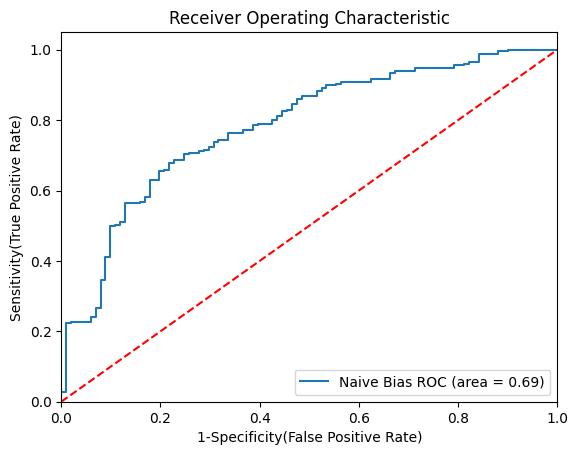

In [201]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Naive Bias',
    'model': GaussianNB(),
    'auc': 0.686108348826149
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()